<a href="https://colab.research.google.com/github/araldi/Python_for_biomedical_data_analysis/blob/main/05_Intro_to_Pandas_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Today we will learn how to:


*   summarize info on dataframe and columns
*   further filter data
*   sort dataset
*   modify dataframes
*   clean dataframes




As usual, import your libraries first:

In [1]:
import pandas as pd
import numpy as np

... and the datasets we will be working on:

In [2]:
# import useful datasets
SNPs = pd.read_csv("https://raw.githubusercontent.com/araldi/Python_for_biomedical_data_analysis/main/Files/CD93_exomeSNPs_annotation.csv")
SNPs.head()

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347


In [3]:
# import useful datasets
chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
# if the file is particularly big, select only subsets of data to import
physical = pd.read_csv('https://raw.githubusercontent.com/araldi/Python_for_biomedical_data_analysis/main/Files/Homework_part_03_04_data.csv',
                       nrows = 10000)
physical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   10000 non-null  int64  
 1   aaaa    10000 non-null  int64  
 2   dddd    10000 non-null  float64
 3   eeee    10000 non-null  float64
 4   bbbb    10000 non-null  float64
 5   cccc    10000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


In [8]:
# this file, without subsetting, is much bigger to import
physical = pd.read_csv('https://raw.githubusercontent.com/araldi/Python_for_biomedical_data_analysis/main/Files/Homework_part_03_04_data.csv')

physical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499214 entries, 0 to 499213
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   499214 non-null  int64  
 1   aaaa    499214 non-null  int64  
 2   dddd    499214 non-null  float64
 3   eeee    499214 non-null  float64
 4   bbbb    499214 non-null  float64
 5   cccc    499214 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 22.9 MB


In [ ]:
physical

# Summarize data

#### Describe the numerical columns

In [ ]:
# Describe the numerical columns of your DataFrame
SNPs.describe()

,Unnamed: 0,PolyPhen score,SIFT score,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
count,2311.000000,639.000000,639.000000,2311.0,2.311000e+03,2.311000e+03
mean,1155.000000,0.376396,0.196948,20.0,2.308341e+07,2.308341e+07
std,667.272558,0.409750,0.272003,0.0,2.005353e+03,2.005379e+03
min,0.000000,0.000000,0.000000,20.0,2.307936e+07,2.307936e+07
25%,577.500000,0.007000,0.000000,20.0,2.308174e+07,2.308174e+07
50%,1155.000000,0.113000,0.070000,20.0,2.308388e+07,2.308388e+07
75%,1732.500000,0.840500,0.290000,20.0,2.308512e+07,2.308512e+07
max,2310.000000,1.000000,1.000000,20.0,2.308632e+07,2.308632e+07


In [ ]:
# all the individual operations
SNPs.mean()

SNPs.std()

SNPs.var()

SNPs.median()

SNPs.quantile([0.25, 0.75])

SNPs.min()

SNPs.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame

Unnamed: 0                                               2310
Variant name                                      rs999917186
Variant consequence                        synonymous_variant
Transcript stable ID                          ENST00000246006
PolyPhen score                                            1.0
SIFT score                                                1.0
Chromosome/scaffold name                                   20
Chromosome/scaffold position start (bp)              23086323
Chromosome/scaffold position end (bp)                23086323
dtype: object

In [ ]:
SNPs.quantile([0.05, 0.1, 0.25, 0.75, 0.9, 0.95])

,Unnamed: 0,PolyPhen score,SIFT score,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0.05,115.5,0.0000,0.000,20.0,23079826.5,23079826.5
0.10,231.0,0.0000,0.000,20.0,23080296.0,23080296.0
0.25,577.5,0.0070,0.000,20.0,23081743.0,23081743.0
0.75,1732.5,0.8405,0.290,20.0,23085121.5,23085121.5
0.90,2079.0,0.9960,0.608,20.0,23085832.0,23085831.0
0.95,2194.5,0.9990,0.864,20.0,23086055.5,23086055.5


#### Count occurrencies

In [ ]:
SNPs.head()

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347


In [ ]:
# Get all the occurrencies for a value
SNPs['Variant consequence'].unique()

array(['3_prime_UTR_variant', 'synonymous_variant', 'missense_variant',
       'intron_variant', 'stop_gained', '5_prime_UTR_variant',
       'frameshift_variant', 'splice_region_variant',
       'splice_acceptor_variant', 'inframe_deletion', 'start_lost',
       'inframe_insertion', 'coding_sequence_variant',
       'protein_altering_variant'], dtype=object)

In [ ]:
# for categorical values, count how many occurrencies (of categorical values) there are in specific columns

SNPs['Variant consequence'].value_counts()

3_prime_UTR_variant         1181
missense_variant             630
synonymous_variant           262
intron_variant                92
5_prime_UTR_variant           41
frameshift_variant            41
stop_gained                   28
inframe_deletion              12
splice_region_variant         11
inframe_insertion              5
start_lost                     3
splice_acceptor_variant        2
coding_sequence_variant        2
protein_altering_variant       1
Name: Variant consequence, dtype: int64

In [ ]:
# How many occurrencies of "Variant consequence" do we have?
len(SNPs['Variant consequence'].value_counts())

14

In [ ]:
# can be done by absolute numbers, but also normalized, or...
SNPs['Variant consequence'].value_counts(normalize = True)

3_prime_UTR_variant         0.511034
missense_variant            0.272609
synonymous_variant          0.113371
intron_variant              0.039810
5_prime_UTR_variant         0.017741
frameshift_variant          0.017741
stop_gained                 0.012116
inframe_deletion            0.005193
splice_region_variant       0.004760
inframe_insertion           0.002164
start_lost                  0.001298
splice_acceptor_variant     0.000865
coding_sequence_variant     0.000865
protein_altering_variant    0.000433
Name: Variant consequence, dtype: float64

In [ ]:
# ...or in descending order

SNPs['Variant consequence'].value_counts(ascending = True)

protein_altering_variant       1
splice_acceptor_variant        2
coding_sequence_variant        2
start_lost                     3
inframe_insertion              5
splice_region_variant         11
inframe_deletion              12
stop_gained                   28
5_prime_UTR_variant           41
frameshift_variant            41
intron_variant                92
synonymous_variant           262
missense_variant             630
3_prime_UTR_variant         1181
Name: Variant consequence, dtype: int64

In [ ]:
SNPs[['Variant consequence', 'Variant name']].value_counts(ascending = True)

Variant consequence  Variant name
3_prime_UTR_variant  rs1000097678    1
missense_variant     rs1234189178    1
                     rs1229158010    1
                     rs1226314202    1
                     rs1225077772    1
                                    ..
                     rs150881468     3
                     rs200571735     3
                     rs568089219     3
                     rs376499581     3
frameshift_variant   rs762805003     3
Length: 2205, dtype: int64

In [ ]:
# access the most frequent "Variant consequence"
SNPs['Variant consequence'].value_counts().head(2)

3_prime_UTR_variant    1181
missense_variant        630
Name: Variant consequence, dtype: int64

In [ ]:
SNPs['Variant consequence'].value_counts()

In [ ]:
# and respectively the index and the values
print(SNPs['Variant consequence'].value_counts().index[0])
print(SNPs['Variant consequence'].value_counts().values[0])

3_prime_UTR_variant
1181


In [ ]:
SNPs['Variant consequence'].value_counts().values

array([1181,  630,  262,   92,   41,   41,   28,   12,   11,    5,    3,
          2,    2,    1])

In [ ]:
# for the least present items, either you index on the last element of the count,
print(SNPs['Variant consequence'].value_counts().tail(1))
print(SNPs['Variant consequence'].value_counts().index[-1])
print(SNPs['Variant consequence'].value_counts().values[-1])

protein_altering_variant    1
Name: Variant consequence, dtype: int64
protein_altering_variant
1


In [ ]:
print(SNPs['Variant consequence'].value_counts(ascending= True).head(1))

protein_altering_variant    1
Name: Variant consequence, dtype: int64


# Filtering and sorting with Pandas

#### Subset dataset based on string content

In [ ]:
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# .str.contains() finds all the occurrencies of the word "salsa" in "choice_description"
chipotle['choice_description'].str.contains('salsa', case= False, na=False)
# case search for strings regardless of case
# na ignores empty cells

0       False
1       False
2       False
3       False
4        True
        ...  
4617     True
4618     True
4619     True
4620     True
4621     True
Name: choice_description, Length: 4622, dtype: bool

In [ ]:
mask =chipotle['choice_description'].str.contains('salsa', case= False, na=False)
chipotle[mask]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
# .str.startswith() finds all the strings starting exactly with the search term
chipotle[chipotle['item_name'].str.startswith('Chicken', na=False)]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
chipotle[chipotle['item_name'].str.endswith('Bowl', na=False)]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
# isin() finds all the items matching elements in the input list

menu_items_of_interest = ['Izze', 'Nantucket Nectar', 'Chicken Bowl']

chipotle[chipotle['item_name'].isin(menu_items_of_interest)]


,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",$8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",$8.75


### Group the dataframe based on values

In [ ]:
# .groupby() is an aggregation function. It automatically splits the data in separate groups.
# but it does not do anything unless explicitly istructed
chipotle.groupby(['item_name'])

In [ ]:
chipotle.head()

In [ ]:
# count the occurrencies of all the other columns based on the groups of "item_name"
chipotle.groupby(['item_name']).count()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,54,54,54,54
Barbacoa Bowl,66,66,66,66
Barbacoa Burrito,91,91,91,91
Barbacoa Crispy Tacos,11,11,11,11
Barbacoa Salad Bowl,10,10,10,10
Barbacoa Soft Tacos,25,25,25,25
Bottled Water,162,162,0,162
Bowl,2,2,2,2
Burrito,6,6,6,6


In [ ]:
# You can access the values of the other columns of the df, like you would access a column of a dataframe
chipotle.groupby(['item_name'])['quantity']

In [ ]:
# and use functions there
chipotle.groupby(['item_name'])['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [ ]:
# and use functions there
chipotle.groupby(['item_name']).mean()

,order_id,quantity
item_name,,
6 Pack Soft Drink,968.925926,1.018519
Barbacoa Bowl,817.757576,1.000000
Barbacoa Burrito,821.076923,1.000000
Barbacoa Crispy Tacos,510.272727,1.090909
Barbacoa Salad Bowl,970.800000,1.000000
Barbacoa Soft Tacos,749.000000,1.000000
Bottled Water,1086.074074,1.302469
Bowl,236.000000,2.000000
Burrito,258.333333,1.000000


### Sort dataset

In [ ]:
SNPs.sort_values(by = 'Chromosome/scaffold position end (bp)', ascending = False)
# notice, this is in descending order


,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
1149,1149,rs984117161,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086323,23086323
1641,1641,rs1276995131,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086317,23086317
2081,2081,rs1442158486,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086311,23086311
1415,1415,rs1188072887,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086300,23086310
2310,2310,rs1600424486,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086310,23086310
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1079,rs950570703,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079366,23079366
1522,1522,rs1228498975,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079364,23079364
7,7,rs3177132,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079362,23079362
506,506,rs748529588,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079361,23079361


In [ ]:
# sort by multiple columns, by assigning a list to the argument
chipotle.sort_values(by = ['item_price', 'item_name'], ascending = True)
# notice, this is in descending order

,order_id,quantity,item_name,choice_description,item_price
34,17,1,Bottled Water,NaN,$1.09
87,38,1,Bottled Water,NaN,$1.09
318,138,1,Bottled Water,NaN,$1.09
701,288,1,Bottled Water,NaN,$1.09
780,321,1,Bottled Water,NaN,$1.09
...,...,...,...,...,...
4241,1693,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$9.39
4391,1752,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Pinto Beans...",$9.39
4419,1762,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$9.39
4547,1807,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$9.39


In [ ]:
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
chipotle.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [ ]:
chipotle['item_price'].str.split('$').str[1].astype(float)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [ ]:
chipotle['item_price_wo_dollar'] = chipotle['item_price'].str.split('$').str[1].astype(float)

In [ ]:
chipotle.groupby(by = 'item_name').sum().sort_values(by ='item_price_wo_dollar', ascending=False)

,order_id,quantity,item_price_wo_dollar
item_name,,,
Chicken Bowl,713926,761,7342.73
Chicken Burrito,497303,591,5575.82
Steak Burrito,328437,386,3851.43
Steak Bowl,193752,221,2260.19
Chips and Guacamole,449959,506,2201.04
Chicken Salad Bowl,117104,123,1228.75
Chicken Soft Tacos,98395,120,1108.09
Veggie Burrito,80962,97,934.77
Barbacoa Burrito,74718,91,894.75


# Data wrangling

Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

### Change column data type

In [ ]:
# Change the data type

SNPs.dtypes

Unnamed: 0                                   int64
Variant name                                object
Variant consequence                         object
Protein allele                              object
Transcript stable ID                        object
PolyPhen score                             float64
PolyPhen prediction                         object
SIFT score                                 float64
SIFT prediction                             object
Chromosome/scaffold name                     int64
Chromosome/scaffold position start (bp)      int64
Chromosome/scaffold position end (bp)        int64
dtype: object

In [ ]:
SNPs['Chromosome/scaffold name'] = SNPs['Chromosome/scaffold name'].astype(int)
SNPs['Chromosome/scaffold name']

0       20
1       20
2       20
3       20
4       20
        ..
2306    20
2307    20
2308    20
2309    20
2310    20
Name: Chromosome/scaffold name, Length: 2311, dtype: int64

### Split the content of a cell

In [ ]:
# split content of columns
#chipotle['item_price'] = chipotle['item_price'].str.split('$').str[1].astype(float)
chipotle['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [ ]:
SNPs.head()

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347


In [ ]:
# split content of columns
SNPs['Variant consequence'].str.split('_')

0       [3, prime, UTR, variant]
1       [3, prime, UTR, variant]
2       [3, prime, UTR, variant]
3       [3, prime, UTR, variant]
4       [3, prime, UTR, variant]
                  ...           
2306       [synonymous, variant]
2307         [missense, variant]
2308         [missense, variant]
2309    [5, prime, UTR, variant]
2310    [5, prime, UTR, variant]
Name: Variant consequence, Length: 2311, dtype: object

In [ ]:
# split content of columns and create a column with the obtained split values
SNPs['Variant consequence'].str.split('_').str[-1].str.split('a')

0       [v, ri, nt]
1       [v, ri, nt]
2       [v, ri, nt]
3       [v, ri, nt]
4       [v, ri, nt]
           ...     
2306    [v, ri, nt]
2307    [v, ri, nt]
2308    [v, ri, nt]
2309    [v, ri, nt]
2310    [v, ri, nt]
Name: Variant consequence, Length: 2311, dtype: object

### Change index or columns of a dataframe

In [ ]:
SNPs

In [ ]:
# change the values of the index
SNPs.set_index(SNPs['Variant name'], inplace= True)  # use inplace = True to apply the change to the dataframe
# SNPs = SNPs.set_index(SNPs['Variant name'])

In [ ]:
SNPs

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
Variant name,,,,,,,,,,,,
rs7492,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
rs2567612,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
rs2749811,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
rs2749812,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
rs2749813,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...,...
rs1600423846,2306,rs1600423846,synonymous_variant,P,ENST00000246006,NaN,NaN,NaN,NaN,20,23085689,23085689
rs1600424016,2307,rs1600424016,missense_variant,W/S,ENST00000246006,1.00,probably damaging,0.00,deleterious,20,23085810,23085810
rs1600424406,2308,rs1600424406,missense_variant,T/P,ENST00000246006,0.36,benign,0.07,tolerated,20,23086186,23086186


In [ ]:
# drop columns
SNPs.drop(columns = ['Variant name'], inplace = True)

In [ ]:
SNPs

,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
Variant name,,,,,,,,,,,
rs7492,0,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
rs2567612,1,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
rs2749811,2,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
rs2749812,3,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
rs2749813,4,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...
rs1600423846,2306,synonymous_variant,P,ENST00000246006,NaN,NaN,NaN,NaN,20,23085689,23085689
rs1600424016,2307,missense_variant,W/S,ENST00000246006,1.00,probably damaging,0.00,deleterious,20,23085810,23085810
rs1600424406,2308,missense_variant,T/P,ENST00000246006,0.36,benign,0.07,tolerated,20,23086186,23086186


In [ ]:
# change the values of the index
SNPs = SNPs.reset_index()
SNPs

,Variant name,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,rs7492,0,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,rs2567612,1,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,rs2749811,2,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,rs2749812,3,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,rs2749813,4,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,rs1600423846,2306,synonymous_variant,P,ENST00000246006,NaN,NaN,NaN,NaN,20,23085689,23085689
2307,rs1600424016,2307,missense_variant,W/S,ENST00000246006,1.00,probably damaging,0.00,deleterious,20,23085810,23085810
2308,rs1600424406,2308,missense_variant,T/P,ENST00000246006,0.36,benign,0.07,tolerated,20,23086186,23086186
2309,rs1600424446,2309,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086256,23086256


In [ ]:
smaller = SNPs[SNPs['Variant consequence'] == '3_prime_UTR_variant']
smaller

,Variant name,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,rs7492,0,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,rs2567612,1,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,rs2749811,2,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,rs2749812,3,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,rs2749813,4,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...,...
2284,rs1600421940,2284,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083206,23083206
2285,rs1600422040,2285,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083426,23083426
2286,rs1600422125,2286,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083624,23083627
2287,rs1600422161,2287,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083664,23083664


In [ ]:
# smaller = SNPs[SNPs['Variant consequence'] == '3_prime_UTR_variant']

smaller.reset_index()

,index,Variant name,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,0,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,1,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,2,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,4,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2284,rs1600421940,2284,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083206,23083206
1177,2285,rs1600422040,2285,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083426,23083426
1178,2286,rs1600422125,2286,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083624,23083627
1179,2287,rs1600422161,2287,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23083664,23083664


In [ ]:
# rename columns
SNPs.rename(columns = {'Variant name' : "Variant"}, inplace = True)
SNPs

,Variant,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,rs7492,0,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,rs2567612,1,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,rs2749811,2,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,rs2749812,3,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,rs2749813,4,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,rs1600423846,2306,synonymous_variant,P,ENST00000246006,NaN,NaN,NaN,NaN,20,23085689,23085689
2307,rs1600424016,2307,missense_variant,W/S,ENST00000246006,1.00,probably damaging,0.00,deleterious,20,23085810,23085810
2308,rs1600424406,2308,missense_variant,T/P,ENST00000246006,0.36,benign,0.07,tolerated,20,23086186,23086186
2309,rs1600424446,2309,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086256,23086256


### Clean the dataframe

In [ ]:
np.nan

nan

#### Drop unnecessary data, or change data

In [ ]:
# remove duplicates
SNPs.drop_duplicates(inplace = True)

In [ ]:
SNPs

,Variant,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,rs7492,0,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,rs2567612,1,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,rs2749811,2,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,rs2749812,3,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,rs2749813,4,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,rs1600423846,2306,synonymous_variant,P,ENST00000246006,NaN,NaN,NaN,NaN,20,23085689,23085689
2307,rs1600424016,2307,missense_variant,W/S,ENST00000246006,1.00,probably damaging,0.00,deleterious,20,23085810,23085810
2308,rs1600424406,2308,missense_variant,T/P,ENST00000246006,0.36,benign,0.07,tolerated,20,23086186,23086186
2309,rs1600424446,2309,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086256,23086256


In [ ]:
# replace values
SNPs.replace(to_replace = 'missense_variant', value = 'trouble', inplace=True)

# Note, this method is very slow in big datasets
# if you know already where the data you want to replace is
# (example, in a specific column), direct the replace function to that column.
# or use boolean-based methods, as below

In [ ]:
SNPs

,Variant,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,rs7492,0,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,rs2567612,1,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,rs2749811,2,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,rs2749812,3,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,rs2749813,4,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,rs1600423846,2306,synonymous_variant,P,ENST00000246006,NaN,NaN,NaN,NaN,20,23085689,23085689
2307,rs1600424016,2307,trouble,W/S,ENST00000246006,1.00,probably damaging,0.00,deleterious,20,23085810,23085810
2308,rs1600424406,2308,trouble,T/P,ENST00000246006,0.36,benign,0.07,tolerated,20,23086186,23086186
2309,rs1600424446,2309,5_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23086256,23086256


In [ ]:
conditions = [SNPs["Variant consequence"] == 'trouble']
choices = ['missense_variant']
SNPs["Variant consequence"] = np.select(conditions, choices, default = SNPs["Variant consequence"])

In [ ]:
SNPs["Variant consequence"].value_counts()

3_prime_UTR_variant         1181
missense_variant             630
synonymous_variant           262
intron_variant                92
5_prime_UTR_variant           41
frameshift_variant            41
stop_gained                   28
inframe_deletion              12
splice_region_variant         11
inframe_insertion              5
start_lost                     3
splice_acceptor_variant        2
coding_sequence_variant        2
protein_altering_variant       1
Name: Variant consequence, dtype: int64

In [ ]:
# replace values based on boolean conditions
# create a new column where to substitute PolyPhen score values:
# if PolyPhen score =1 with 100
# if PolyPhen score =0 with -100
# if PolyPhen score = NaN with 0
conditions = [SNPs['PolyPhen score'] ==1, SNPs['PolyPhen score'] ==0, SNPs['PolyPhen score'].isna()]
choices = [100, -100, 0]
SNPs['new_polyphen'] = np.select(conditions, choices, default = 'not_condition')

In [ ]:
SNPs['new_polyphen'].value_counts()

0                1672
not_condition     543
-100               76
100                20
Name: new_polyphen, dtype: int64

#### Dealing with missing values

In [ ]:
# check how many NaN values
pd.isnull(SNPs).sum()

Variant                                       0
Unnamed: 0                                    0
Variant consequence                           0
Protein allele                             1322
Transcript stable ID                          0
PolyPhen score                             1672
PolyPhen prediction                        1672
SIFT score                                 1672
SIFT prediction                            1672
Chromosome/scaffold name                      0
Chromosome/scaffold position start (bp)       0
Chromosome/scaffold position end (bp)         0
new_polyphen                                  0
dtype: int64

In [ ]:
# assign NaN values to column Unnamed: 0

SNPs['Unnamed: 0'] = np.nan
pd.isnull(SNPs).sum()

Variant                                       0
Unnamed: 0                                 2311
Variant consequence                           0
Protein allele                             1322
Transcript stable ID                          0
PolyPhen score                             1672
PolyPhen prediction                        1672
SIFT score                                 1672
SIFT prediction                            1672
Chromosome/scaffold name                      0
Chromosome/scaffold position start (bp)       0
Chromosome/scaffold position end (bp)         0
new_polyphen                                  0
dtype: int64

In [ ]:
# substitute the NaN values to 1.0

SNPs['Unnamed: 0'].fillna('nothing', inplace = True)
pd.isnull(SNPs).sum()

Variant                                       0
Unnamed: 0                                    0
Variant consequence                           0
Protein allele                             1322
Transcript stable ID                          0
PolyPhen score                             1672
PolyPhen prediction                        1672
SIFT score                                 1672
SIFT prediction                            1672
Chromosome/scaffold name                      0
Chromosome/scaffold position start (bp)       0
Chromosome/scaffold position end (bp)         0
new_polyphen                                  0
dtype: int64

In [ ]:
SNPs['Unnamed: 0']

0       nothing
1       nothing
2       nothing
3       nothing
4       nothing
         ...   
2306    nothing
2307    nothing
2308    nothing
2309    nothing
2310    nothing
Name: Unnamed: 0, Length: 2311, dtype: object

In [ ]:
SNPs.dropna()

,Variant,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp),new_polyphen
8,rs3746731,nothing,missense_variant,P/S,ENST00000246006,0.086,benign,0.17,tolerated,20,23084572,23084572,not_condition
9,rs3746731,nothing,missense_variant,P/T,ENST00000246006,0.476,possibly damaging,0.01,deleterious,20,23084572,23084572,not_condition
16,rs6048538,nothing,missense_variant,S/Y,ENST00000246006,0.960,probably damaging,0.00,deleterious,20,23085537,23085537,not_condition
19,rs6076020,nothing,missense_variant,G/C,ENST00000246006,0.319,benign,0.01,deleterious,20,23085688,23085688,not_condition
20,rs6076020,nothing,missense_variant,G/S,ENST00000246006,0.000,benign,0.50,tolerated,20,23085688,23085688,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,rs1600423545,nothing,missense_variant,F/C,ENST00000246006,0.846,possibly damaging,0.00,deleterious,20,23085396,23085396,not_condition
2303,rs1600423559,nothing,missense_variant,C/G,ENST00000246006,0.611,possibly damaging,0.00,deleterious,20,23085424,23085424,not_condition
2304,rs1600423634,nothing,missense_variant,Q/H,ENST00000246006,0.000,benign,0.31,tolerated,20,23085491,23085491,-100
2307,rs1600424016,nothing,missense_variant,W/S,ENST00000246006,1.000,probably damaging,0.00,deleterious,20,23085810,23085810,100


In [ ]:
# drop rows that contain NaNs in specific columns

SNPs.dropna(subset = ['PolyPhen prediction', 'Protein allele'], inplace = True)

In [ ]:
SNPs

,Variant,Unnamed: 0,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp),new_polyphen
8,rs3746731,nothing,missense_variant,P/S,ENST00000246006,0.086,benign,0.17,tolerated,20,23084572,23084572,not_condition
9,rs3746731,nothing,missense_variant,P/T,ENST00000246006,0.476,possibly damaging,0.01,deleterious,20,23084572,23084572,not_condition
16,rs6048538,nothing,missense_variant,S/Y,ENST00000246006,0.960,probably damaging,0.00,deleterious,20,23085537,23085537,not_condition
19,rs6076020,nothing,missense_variant,G/C,ENST00000246006,0.319,benign,0.01,deleterious,20,23085688,23085688,not_condition
20,rs6076020,nothing,missense_variant,G/S,ENST00000246006,0.000,benign,0.50,tolerated,20,23085688,23085688,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,rs1600423545,nothing,missense_variant,F/C,ENST00000246006,0.846,possibly damaging,0.00,deleterious,20,23085396,23085396,not_condition
2303,rs1600423559,nothing,missense_variant,C/G,ENST00000246006,0.611,possibly damaging,0.00,deleterious,20,23085424,23085424,not_condition
2304,rs1600423634,nothing,missense_variant,Q/H,ENST00000246006,0.000,benign,0.31,tolerated,20,23085491,23085491,-100
2307,rs1600424016,nothing,missense_variant,W/S,ENST00000246006,1.000,probably damaging,0.00,deleterious,20,23085810,23085810,100


In [ ]:
# Delete all the columns  that contain missing values
SNPs.dropna()


### Combine data

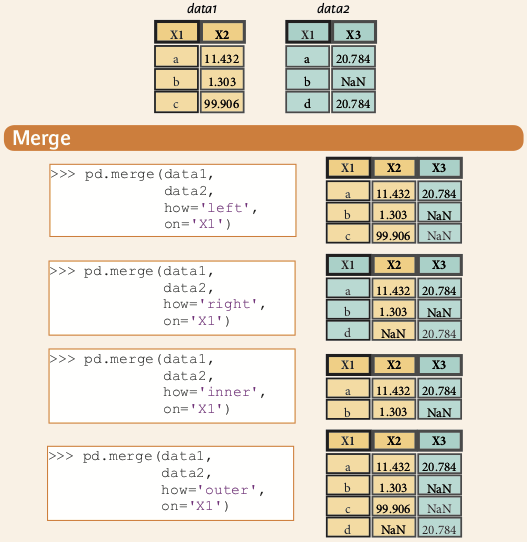

In [ ]:
help(pd.merge)

In [ ]:
import pandas as pd
# Create dataframe

df1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

df2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

df3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [ ]:
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df3 = pd.DataFrame(df3)

In [ ]:
df1.head()

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [ ]:
df2.head()

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
df3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [ ]:
# Join the two dataframes along rows
all_data = pd.concat([df1, df2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
pd.concat([df1, df2], axis = 1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [ ]:
# Merge all_data and data3 along the subject_id value¶
pd.merge(all_data, df3, on='subject_id') #takes left, right dataframe and column on which to merge

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [ ]:
pd.merge(all_data, df3, on='subject_id', how='left')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ackerman,15.0
2,3,Allen,Ali,15.0
3,4,Alice,Aoni,61.0
4,5,Ayoung,Atiches,16.0
5,4,Billy,Bonder,61.0
6,5,Brian,Black,16.0
7,6,Bran,Balwner,NaN
8,7,Bryce,Brice,14.0
9,8,Betty,Btisan,15.0


In [ ]:
# Merge only the data that has the same 'subject_id' on both data1 and data2
pd.merge(df1, df2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [ ]:
# Merge all values in data1 and data2, with matching records from both sides where available.
pd.merge(all_data, df3, on='subject_id', how='outer')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ackerman,15.0
2,3,Allen,Ali,15.0
3,4,Alice,Aoni,61.0
4,4,Billy,Bonder,61.0
5,5,Ayoung,Atiches,16.0
6,5,Brian,Black,16.0
7,6,Bran,Balwner,NaN
8,7,Bryce,Brice,14.0
9,8,Betty,Btisan,15.0


# Exercise 1

In the SNPs dataset, subset the dataset based on the most common variant consequence, and print the SNP with the last (biggest) Chromosome/scaffold position end (bp)

# Exercise 2
What is the most ordered  item in the chipotle dataframe?
And how many of these items were ordered?
What was the cumulative revenue of this item?

# Exercise 3


Create the following individual dataframes, get info on them, then merge them



In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})



In [ ]:
# your code here

Show the resulting dataframe, then merge it with the following dataframe. On which column do you merge? why?

In [ ]:
df3 = pd.DataFrame({'group': ['Accounting', 'Engineering'],
                    'supervisor': ['Carly', 'Guido']})

In [ ]:
# your code here

Try the inner and outer method, and the left or right method on merging df1, df2 and df3 into new dataframes.

In [ ]:
# your code here

In [ ]:
# your code here

What happens if I have two columns with the same name in two dataframes I want to join, but don't want to join on them (keep their original identity)?


In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Jen'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Management'],
                    'skills' : ['math', 'marketing', 'organization', 'coding', 'organization']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014],
                    'skills' : ['spreadsheets', 'advertisement', 'editing', 'linux', ]})



In [ ]:
# your code here

Test the different combinations of inner/outer/left/right

In [ ]:
# your code here


What happens if you want to concatenate the dataframes df1 and df2?



In [ ]:
# your code here